In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import datetime
import warnings
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import layers


In [2]:
warnings.filterwarnings("ignore")

In [16]:
AAPL = yf.Ticker('AAPL')
AAPL = AAPL.history(start='2010-01-01',end='2020-12-31')
MCD = yf.Ticker('MCD')
MCD = MCD.history(start='2010-01-01',end='2020-12-31')
JPM = yf.Ticker('JPM')
JPM = JPM.history(start='2010-01-01',end='2020-12-31')

In [3]:
# Load Series, aggiornati al 15/06/2022
GOOGL=pd.read_csv("E:/Laurea Magistrale/Artificial intelligence and deep learning/Esame/Financial Series/GOOGL.csv")
NKE = pd.read_csv("E:/Laurea Magistrale/Artificial intelligence and deep learning/Esame/Financial Series/NKE.csv")
HD = pd.read_csv("E:/Laurea Magistrale/Artificial intelligence and deep learning/Esame/Financial Series/HD.csv")
JPM = pd.read_csv("E:/Laurea Magistrale/Artificial intelligence and deep learning/Esame/Financial Series/JPM.csv")
BA= pd.read_csv("E:/Laurea Magistrale/Artificial intelligence and deep learning/Esame/Financial Series/BA.csv")
JNJ = pd.read_csv("E:/Laurea Magistrale/Artificial intelligence and deep learning/Esame/Financial Series/JNJ.csv")
AAPL=pd.read_csv("E:/Laurea Magistrale/Artificial intelligence and deep learning/Esame/Financial Series/AAPL.csv")
INTC=pd.read_csv("E:/Laurea Magistrale/Artificial intelligence and deep learning/Esame/Financial Series/INTC.csv")
MCD=pd.read_csv("E:/Laurea Magistrale/Artificial intelligence and deep learning/Esame/Financial Series/MCD.csv")
TRV=pd.read_csv("E:/Laurea Magistrale/Artificial intelligence and deep learning/Esame/Financial Series/TRV.csv")

In [5]:
#GOOGL.info()
# faccio un merge verticale dei dati, creo la colonna di indentificazione del titolo e formatto la data
GOOGL.insert(7,column="Stock",value=np.repeat("GOOGL",3525))
NKE.insert(7,column="Stock",value=np.repeat("NKE",3525))
HD.insert(7, column="Stock", value=np.repeat("HD", 3525))
AAPL.insert(7, column="Stock", value=np.repeat("AAPL", 3525))
BA.insert(7, column="Stock", value=np.repeat("BA", 3525))
INTC.insert(7, column="Stock", value=np.repeat("INTC", 3525))
JNJ.insert(7, column="Stock", value=np.repeat("JNJ", 3525))
MCD.insert(7, column="Stock", value=np.repeat("MCD", 3525))
TRV.insert(7, column="Stock", value=np.repeat("TRV", 3525))
JPM.insert(7, column="Stock", value=np.repeat("JPM", 3525))
Series = pd.merge(GOOGL, NKE, how='outer')
Series = pd.merge(Series, HD, how='outer')
Series = pd.merge(Series, AAPL, how = 'outer')
Series = pd.merge(Series, BA, how='outer')
Series = pd.merge(Series, INTC, how = 'outer')
Series = pd.merge(Series, JNJ, how = 'outer')
Series = pd.merge(Series, MCD, how = 'outer')
Series = pd.merge(Series, TRV, how = 'outer')
Series = pd.merge(Series, JPM, how = 'outer')
Series['Date']=pd.to_datetime(Series['Date'],)
#Series = Series.set_index('Date')
Series.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35250 entries, 0 to 35249
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       35250 non-null  datetime64[ns]
 1   Open       35250 non-null  float64       
 2   High       35250 non-null  float64       
 3   Low        35250 non-null  float64       
 4   Close      35250 non-null  float64       
 5   Adj Close  35250 non-null  float64       
 6   Volume     35250 non-null  int64         
 7   Stock      35250 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 2.4+ MB


ANALISI ESPLORATIVA:


Verrà effettuata un'analisi esplorativa sia grafica sull'andamento dei prezzi di apertura, sia volta a studiare la forza della correlazione seriale
di ogni titolo ed eventuale presenza di cointegrazione fra i titoli.

Text(32.28923611111111, 0.5, 'Open Price')

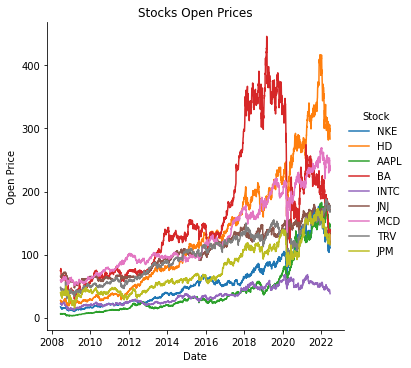

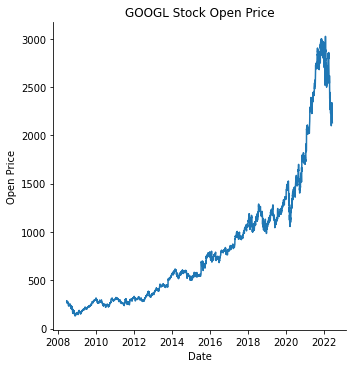

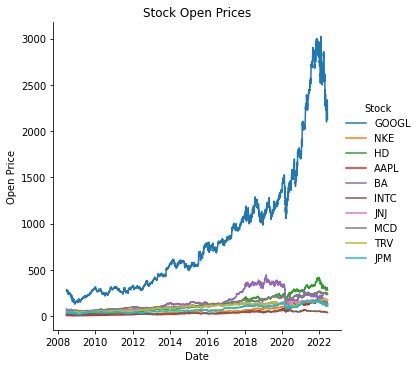

In [4]:
sns.relplot(x="Date", y="Open", data=Series[Series['Stock']!="GOOGL"], kind="line", hue="Stock")
plt.ylabel("Open Price")
plt.title("Stocks Open Prices")
sns.relplot(x="Date", y="Open", data=Series[Series['Stock']=="GOOGL"], kind = "line")
plt.title("GOOGL Stock Open Price")
plt.ylabel("Open Price")
#------- serie insieme -----------------
sns.relplot(x="Date", y="Open", data=Series, kind='line', hue="Stock")
plt.title("Stock Open Prices")
plt.ylabel("Open Price")

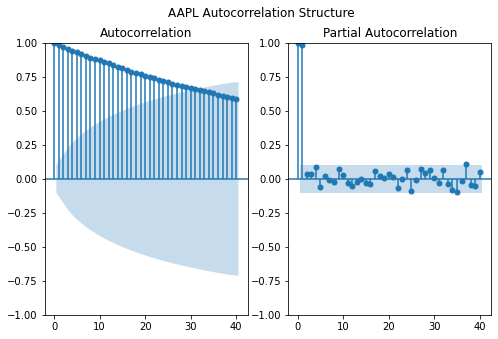

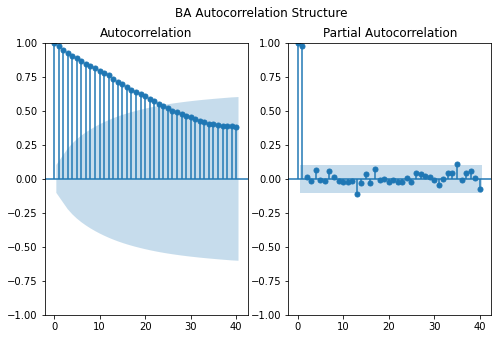

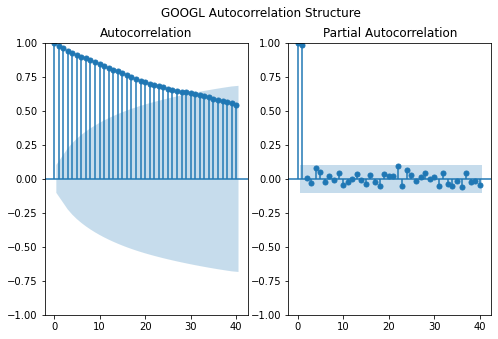

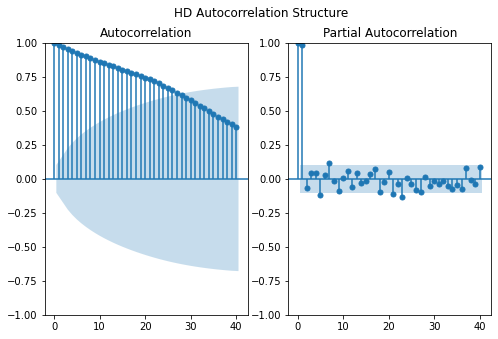

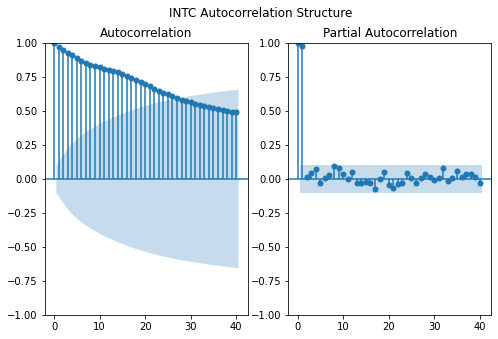

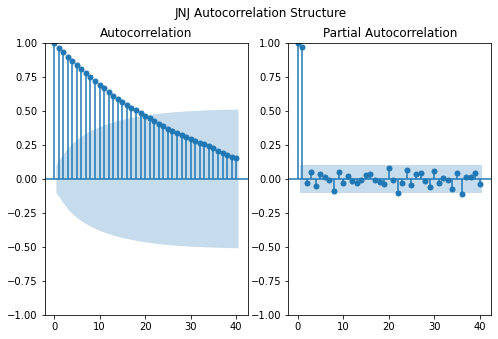

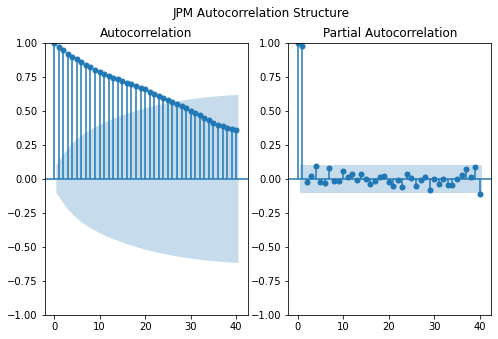

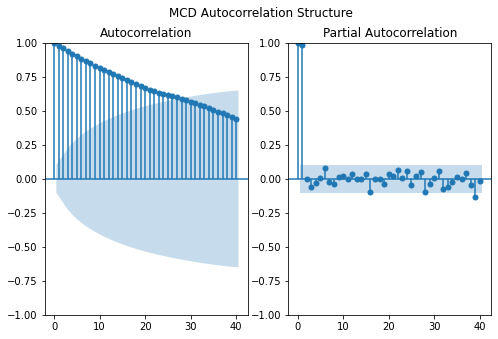

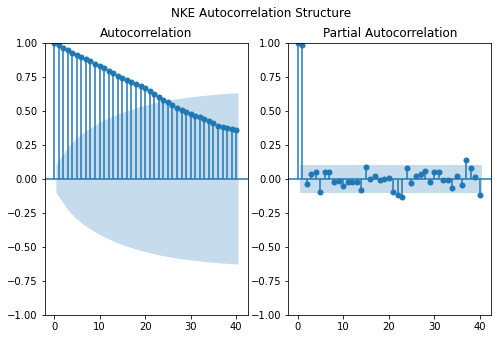

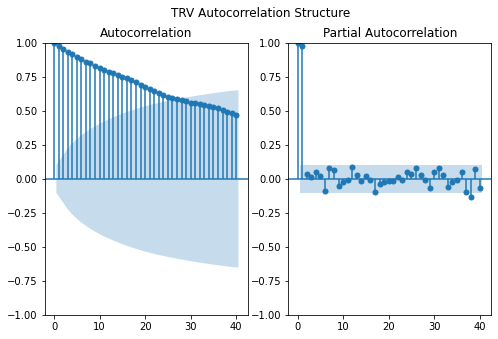

In [6]:
series2 = pd.pivot(data=Series, index="Date", columns="Stock", values="Open") # time series in wider format.
for s in series2.columns.values:
    fig, ax = plt.subplots(1, 2, figsize=(8,5))
    plot_acf(series2[s].tail(365), lags=40, ax=ax[0])
    plot_pacf(series2[s].tail(365), lags=40, ax=ax[1])
    plt.suptitle(s + " Autocorrelation Structure")
    plt.show()


c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


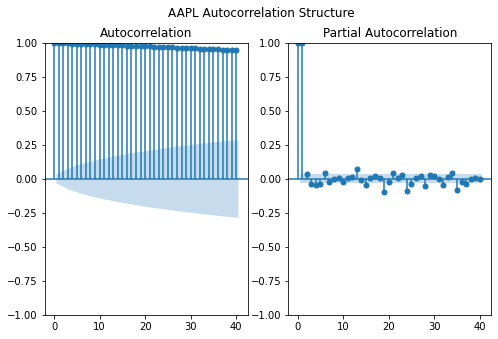

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


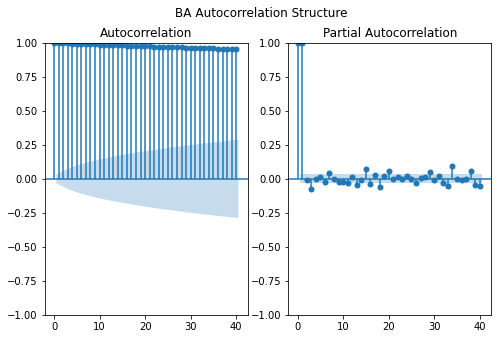

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


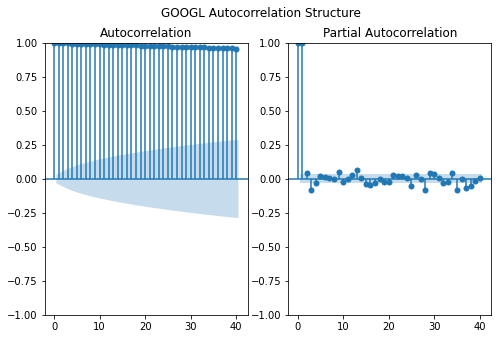

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


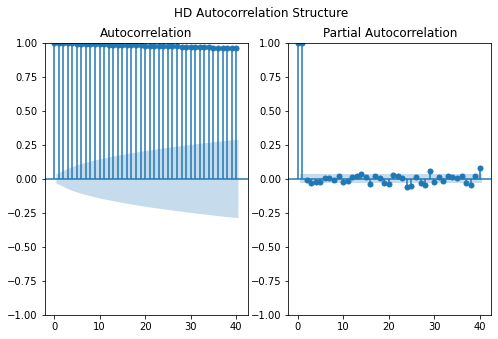

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


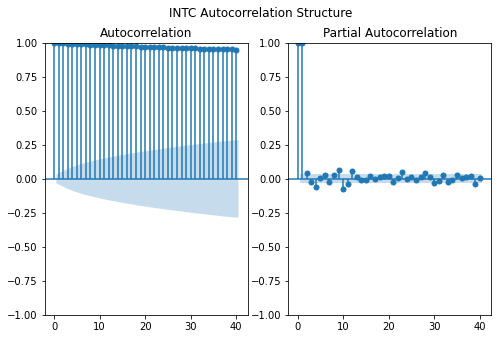

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


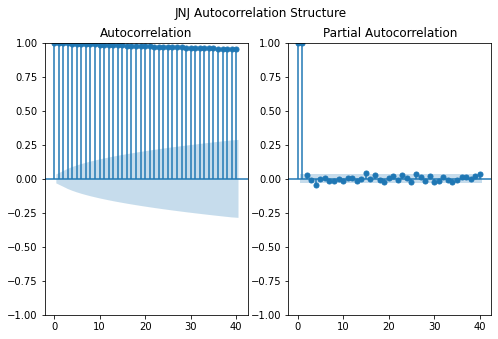

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


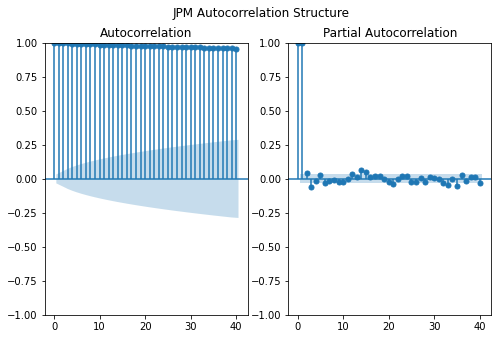

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


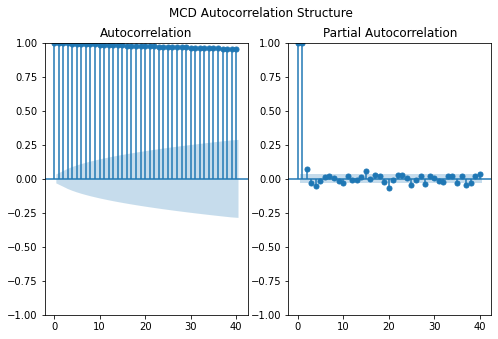

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


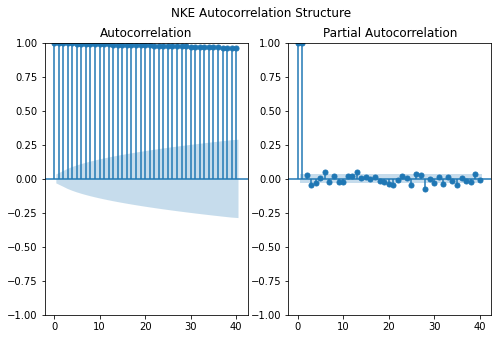

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


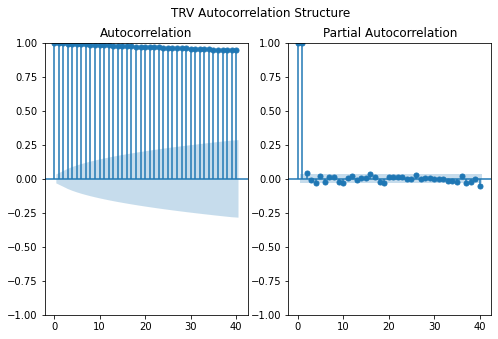

In [7]:
# ACF E PACF di ogni serie; utile anche a capire l'ordine del modello ARIMA
for s in series2.columns.values:
    fig, ax = plt.subplots(1, 2, figsize=(8,5))
    plot_acf(series2[s], lags=40, ax=ax[0])
    plot_pacf(series2[s], lags=40, ax=ax[1])
    plt.suptitle(s + " Autocorrelation Structure")
    plt.show()

In [ ]:
##
## TEST DI COINTEGRAZIONE DI JOHANSEN
##
#Series = Series.set_index('Date')
#series2.set_index(Series['Date'])
# Definisco una nuova funzione che permette di visualizzare anche un summary del test
def cointegration_test(df, alpha=0.05): 
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)
    # Summary
    print("\nJohanson's Cointegration Test and Summary \n",'--'*20)
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)
    
cointegration_test(series2)

# Il test condotto sulle serie risulta essere non significativo ad eccezzione sulla serie Apple, che quindi risulta cointegrata con le altre. 
# A questo punto si procederà non considerando la serie AAPL in modo da non dover complicare i modelli baseline, ed utilizzare la modellistica ARIMA.
# Prima di ciò si ripete il test di cointegrazione di johansen su tutte le serie ad eccezzione della serie APPLE
series3 = series2.drop("AAPL", axis=1)
cointegration_test(series2)
series4 = series3.drop("BA", axis=1)
cointegration_test(series2)

In [10]:
# ADF test per verificare la stazionarietà in media; (relativo a modelli arima; verrà preso in considerazione soltanto l'ultimo anno
# in quanto è ovvio che prendendo tutta la finestra temporale a disposizione si incorrerà al problema della radice unitaria)
series2 = series2.tail(254)
test_adf = {}
for s in series2.columns.values:
    print('Augmented Dickey-Fuller Results for',s,'Series:')
    test_adf[s] = adfuller(series2[s],autolag = "AIC")   
    ADFresult = pd.Series(test_adf[s][0:4], index = ['ADF Test Statistic','P-Value','# Lags Used', '# Observation Used'])
    print(ADFresult,'\n')
    # non si rigetta l'ipotesi di radice unitaria per nessuna serie


Augmented Dickey-Fuller Results for AAPL Series:
ADF Test Statistic     -2.099591
P-Value                 0.244679
# Lags Used             0.000000
# Observation Used    253.000000
dtype: float64 

Augmented Dickey-Fuller Results for BA Series:
ADF Test Statistic     -0.125788
P-Value                 0.946809
# Lags Used             0.000000
# Observation Used    253.000000
dtype: float64 

Augmented Dickey-Fuller Results for GOOGL Series:
ADF Test Statistic     -1.207068
P-Value                 0.670548
# Lags Used             0.000000
# Observation Used    253.000000
dtype: float64 

Augmented Dickey-Fuller Results for HD Series:
ADF Test Statistic     -0.915079
P-Value                 0.782966
# Lags Used             0.000000
# Observation Used    253.000000
dtype: float64 

Augmented Dickey-Fuller Results for INTC Series:
ADF Test Statistic     -0.832012
P-Value                 0.809537
# Lags Used             0.000000
# Observation Used    253.000000
dtype: float64 

Augmented Dic

MODELLAZIONE ARIMA



In [43]:
warnings.filterwarnings("ignore")
finestra_train=AAPL.index.to_series().between('2019-01-01', '2019-12-31')
finestra_test = AAPL.index.to_series().between('2020-01-01', '2020-01-30')


In [44]:
# AAPL STock Open Price
train = AAPL['Open'][finestra_train]
test = AAPL['Open'][finestra_test]

In [45]:
modello_AAPL = ARIMA(train, order = (2,1,0)).fit()
modello_AAPL.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Open   No. Observations:                  252
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -272.079
Date:                Sun, 19 Jun 2022   AIC                            550.158
Time:                        14:45:15   BIC                            560.734
Sample:                             0   HQIC                           554.414
                                - 252                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0418      0.066      0.631      0.528      -0.088       0.172
ar.L2          0.0005      0.065      0.008      0.994      -0.128       0.129
sigma2         0.5117      0.036     14.239      0.000       0.441       0.582
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):                37.16
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               1.33   Skew:                            -0.37
Prob(H) (two-sided):                  0.19   Kurtosis:                         4.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

MSE: 30.792342834223025


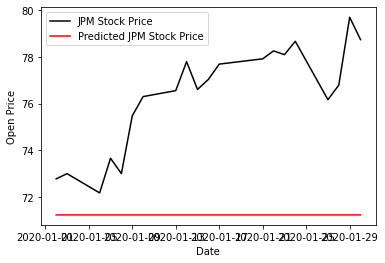

In [46]:
# MSE
yhat_AAPL = modello_AAPL.forecast(steps=20)
MSE_AAPL=mean_squared_error(test, yhat_AAPL)
print("MSE:",MSE_AAPL)
yhat_AAPL.index = test.index
plt.plot(test, color = "black", label = "JPM Stock Price")
plt.plot(yhat_AAPL, color = "red", label = "Predicted JPM Stock Price")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Open Price")
plt.show()

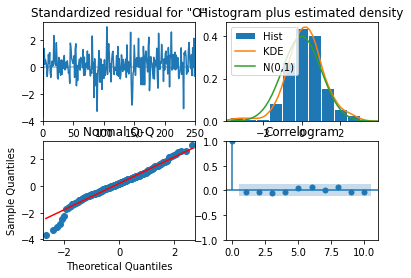

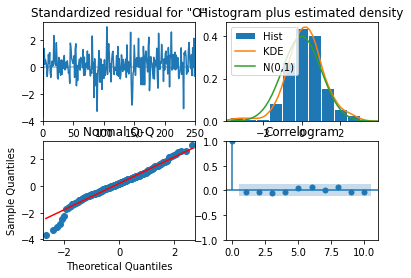

In [47]:
modello_AAPL.plot_diagnostics()

In [48]:
# HD Stock Open price
train = JPM['Open'][finestra_train]
test = JPM['Open'][finestra_test]
modello_JPM = ARIMA(train, order = (1,1,1)).fit()
modello_JPM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Open   No. Observations:                  252
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -396.875
Date:                Sun, 19 Jun 2022   AIC                            799.751
Time:                        14:45:48   BIC                            810.327
Sample:                             0   HQIC                           804.007
                                - 252                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6620      0.407      1.628      0.103      -0.135       1.459
ma.L1         -0.5906      0.438     -1.349      0.177      -1.449       0.267
sigma2         1.3832      0.114     12.105      0.000       1.159       1.607
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 1.79
Prob(Q):                              0.78   Prob(JB):                         0.41
Heteroskedasticity (H):               1.13   Skew:                             0.15
Prob(H) (two-sided):                  0.59   Kurtosis:                         3.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

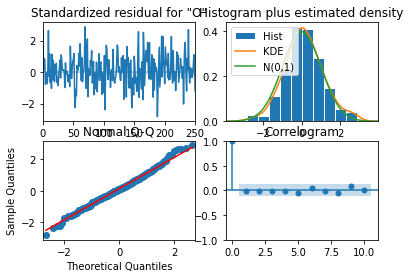

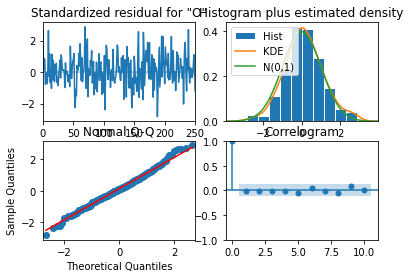

In [26]:
modello_JPM.plot_diagnostics()

5.19187725493122


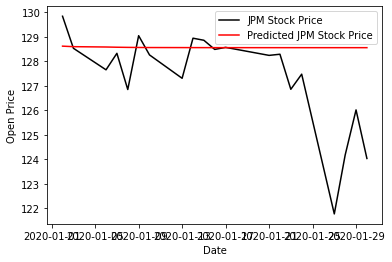

In [49]:
yhat_JPM = modello_JPM.forecast(steps=20)
MSE_JPM=mean_squared_error(test, yhat_JPM)
print(MSE_JPM)
yhat_JPM.index = test.index
plt.plot(test, color = "black", label = "JPM Stock Price")
plt.plot(yhat_JPM, color = "red", label = "Predicted JPM Stock Price")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Open Price")
plt.show()

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', name='Date', freq=None)

CONVOLUTIONAL NEURAL NETWORK

In [2]:
JPM = yf.Ticker('JPM')
JPM = JPM.history(start='2015-01-01',end='2020-12-31')
filter_row = JPM.index.to_series().between('2015-01-01', '2019-12-31')
test = JPM[filter_row == False]
train = JPM[filter_row==True]
#check for train set
print(train.shape)
train.head()

(1258, 7)


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-01-02,50.950406,51.589539,50.860272,51.204422,12600000,0.4,0
2015-01-05,50.852071,51.032337,49.352565,49.614773,20100600,0.0,0
2015-01-06,49.688526,49.778661,47.812096,48.328320,29074100,0.0,0
2015-01-07,49.073967,49.073967,48.074296,48.402058,23843200,0.0,0
2015-01-08,49.139522,49.901566,49.139522,49.483669,16971100,0.0,0


In [3]:
# check for test set
test.head() # eliminiamo il valore del 2014
test = test.drop(test.index[0])
print(test.shape)
test.head()

(252, 7)


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02,129.840498,131.057271,129.348221,131.047974,10803700,0.0,0
2020-01-03,128.533385,130.150564,128.140775,129.318604,10386800,0.9,0
2020-01-06,127.654710,129.253205,127.598625,129.215805,10259000,0.0,0
2020-01-07,128.327726,128.869904,126.962943,127.019028,10531300,0.0,0
2020-01-08,126.850776,128.608182,126.757305,128.009918,9695300,0.0,0


In [35]:
y_train, X_train = train['Open'], train.drop('Open', axis=1)
X_test, y_test = test.drop('Open', axis=1), test['Open']

In [36]:
mc = MinMaxScaler(feature_range=(0,1))
X_train[['High','Low','Close', 'Volume','Dividends','Stock Splits']]= mc.fit_transform(X_train[['High','Low','Close', 'Volume','Dividends','Stock Splits']].values)
X_test[['High','Low','Close', 'Volume', 'Dividends','Stock Splits']]=mc.fit_transform(X_test[['High','Low','Close', 'Volume', 'Dividends','Stock Splits']].values)

In [42]:
X_train = np.array(X_train)
X_train = X_train.reshape(X_train.shape[0],6,1)
print(X_train)



[[[0.07324728]
  [0.10650212]
  [0.07825514]
  [0.17545018]
  [0.44444444]
  [0.        ]]

 [[0.06667079]
  [0.08921787]
  [0.05953559]
  [0.31732428]
  [0.        ]
  [0.        ]]

 [[0.05187402]
  [0.07155805]
  [0.04438644]
  [0.48705833]
  [0.        ]
  [0.        ]]

 ...

 [[0.99660158]
  [1.        ]
  [0.99715647]
  [0.08594802]
  [0.        ]
  [0.        ]]

 [[1.        ]
  [0.99787046]
  [0.9915783 ]
  [0.06882613]
  [0.        ]
  [0.        ]]

 [[0.99342209]
  [0.99595349]
  [1.        ]
  [0.07333926]
  [0.        ]
  [0.        ]]]


In [43]:
def to_supervised(train, n_input, n_out=5):
	# flatten data
	data = train.reshape((train.shape[0]*train.shape[1], 1))
	X, y = list(), list()
	in_start = 0
	# step over the entire history one time step at a time
	for _ in range(len(data)):
		# define the end of the input sequence
		in_end = in_start + n_input
		out_end = in_end + n_out
		# ensure we have enough data for this instance
		if out_end <= len(data):
			x_input = data[in_start:in_end, 0]
			x_input = x_input.reshape((len(x_input), 1))
			X.append(x_input)
			y.append(data[in_end:out_end, 0])
		# move along one time step
		in_start += 1
	return np.array(X), np.array(y)

In [43]:
model = keras.Sequential(
    [
     keras.Input(shape=(6,1)),
     layers.Conv1D(132, kernel_size = 2, activation='relu'),
     layers.MaxPooling1D(pool_size = 2),
     layers.Flatten(),
     layers.Dense(64, activation="relu"),
     layers.Dense(1, activation = "relu")
    ]
)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 5, 132)            396       
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 2, 132)           0         
 1D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 264)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                16960     
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 17,421
Trainable params: 17,421
Non-trainable params: 0
__________________________________________________

In [44]:
earlyStop = keras.callbacks.EarlyStopping(patience=2)

In [45]:
batch_size = 4
epochs = 20
model.compile(loss=keras.losses.mean_squared_error, optimizer="adam", metrics=["MSE"])
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, callbacks=[earlyStop])

Epoch 1/20
283/283 [==============================] - 2s 4ms/step - loss: 3306.8096 - MSE: 3306.8096 - val_loss: 37.0690 - val_MSE: 37.0690
Epoch 2/20
283/283 [==============================] - 1s 3ms/step - loss: 15.9882 - MSE: 15.9882 - val_loss: 5.8630 - val_MSE: 5.8630
Epoch 3/20
283/283 [==============================] - 1s 3ms/step - loss: 9.5668 - MSE: 9.5668 - val_loss: 5.0729 - val_MSE: 5.0729
Epoch 4/20
283/283 [==============================] - 1s 3ms/step - loss: 7.6220 - MSE: 7.6220 - val_loss: 2.0745 - val_MSE: 2.0745
Epoch 5/20
283/283 [==============================] - 1s 3ms/step - loss: 6.0870 - MSE: 6.0870 - val_loss: 2.4952 - val_MSE: 2.4952
Epoch 6/20
283/283 [==============================] - 1s 3ms/step - loss: 4.4646 - MSE: 4.4646 - val_loss: 1.7072 - val_MSE: 1.7072
Epoch 7/20
283/283 [==============================] - 1s 2ms/step - loss: 2.9619 - MSE: 2.9619 - val_loss: 1.6120 - val_MSE: 1.6120
Epoch 8/20
283/283 [==============================] - 1s 4ms/step 

In [19]:
# valutazione previsiva per la prima settimana out-of-sample
X_test=np.array(X_test)
score= model.evaluate(X_test[2:6],y_test[2:6])

1/1 [==============================] - 0s 28ms/step - loss: 3.5491 - MSE: 3.5491


In [29]:
checkpoint = keras.callbacks.ModelCheckpoint("E:/Laurea Magistrale/Artificial intelligence and deep learning/Esame/Checkpoints.h5",save_best_only=True, save_weights_only=True, monitor="val_MSE" )

In [46]:
def walk_forward_fitting_procedure(X_test, y_test, n_input):
    #X, y = list(), list()
    in_start = 0
    for _ in range(len(train)):
        in_end = in_start + n_input
        out_end = in_end + n_input
        if out_end <= len(test):
           newX_train = X_test[in_end:out_end]
           newy_train = y_test[in_end:out_end]
           model.fit(newX_train, newy_train)
           X_test=X_test.drop(X_test.index[0:5])
           y_test=y_test.drop(y_test.index[0:5])
           score = model.evaluate(X_test, y_test)
    return score 

In [47]:
score = walk_forward_fitting_procedure(X_test=X_test, y_test=y_test,n_input=5)

1/1 [==============================] - 0s 41ms/step - loss: 21.0359 - MSE: 21.0359


ValueError: Unexpected result of `train_function` (Empty logs). Please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.